In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os



In [7]:
folder_path = "../backend/app/data/Trace/"  # Dossier contenant les fichiers CSV
df = pd.read_csv(os.path.join(folder_path, "data.csv"))  # Lire le CSV

In [10]:
print(df.head(5))

   Num_Test ID_user  Ville Input Technologie_Reseau              Output  \
0         1   AMOUR  PARIS  Midi               Wifi  Without headphones   
1         2   AMOUR  PARIS  Midi               Wifi  Without headphones   
2         3   AMOUR  PARIS  Midi               Wifi  Without headphones   
3         4   AMOUR  PARIS  Midi               Wifi  Without headphones   
4         5   AMOUR  PARIS  Midi               Wifi  Without headphones   

             Date_Performance              Moment du ping  Latence  Jitter  \
0  2024-11-15 16:47:14.447847  2024-11-15 16:47:17.964277    18.47    0.00   
1  2024-11-15 16:47:14.447847  2024-11-15 16:47:19.890068    12.43    6.04   
2  2024-11-15 16:47:14.447847  2024-11-15 16:47:21.956000    14.78    2.35   
3  2024-11-15 16:47:14.447847  2024-11-15 16:47:23.970322    14.28    0.50   
4  2024-11-15 16:47:14.447847  2024-11-15 16:47:25.907598    14.50    0.22   

      IP_source       server_name  IP_destination  Port_source  \
0  10.68.252.1

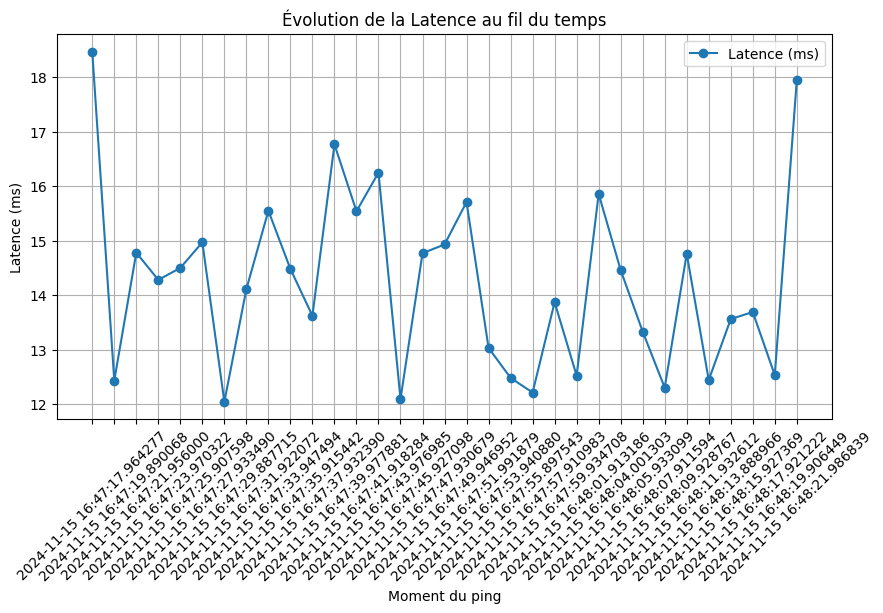

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(df["Moment du ping"], df["Latence"], marker='o', linestyle='-', label="Latence (ms)")
plt.xlabel("Moment du ping")
plt.ylabel("Latence (ms)")
plt.title("√âvolution de la Latence au fil du temps")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

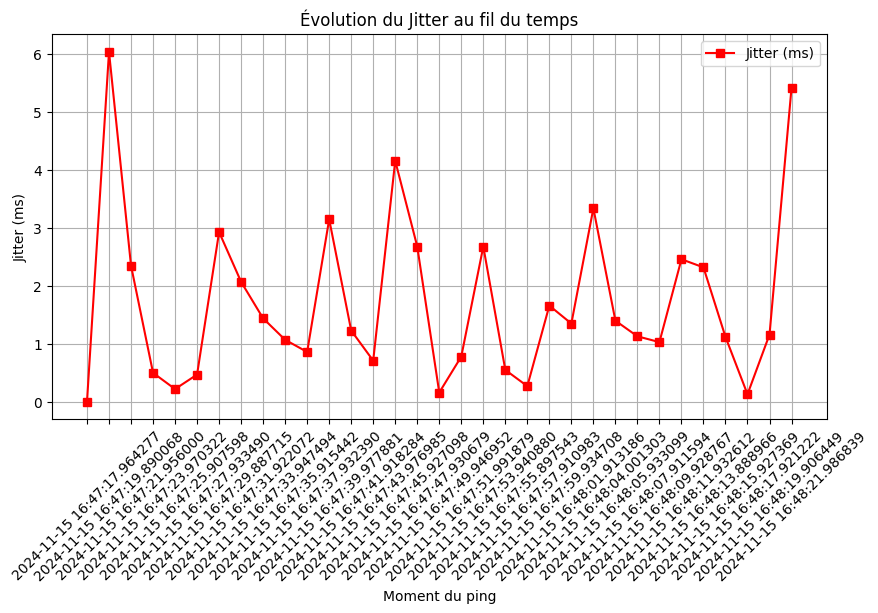

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(df["Moment du ping"], df["Jitter"], marker='s', linestyle='-', color='r', label="Jitter (ms)")
plt.xlabel("Moment du ping")
plt.ylabel("Jitter (ms)")
plt.title("√âvolution du Jitter au fil du temps")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

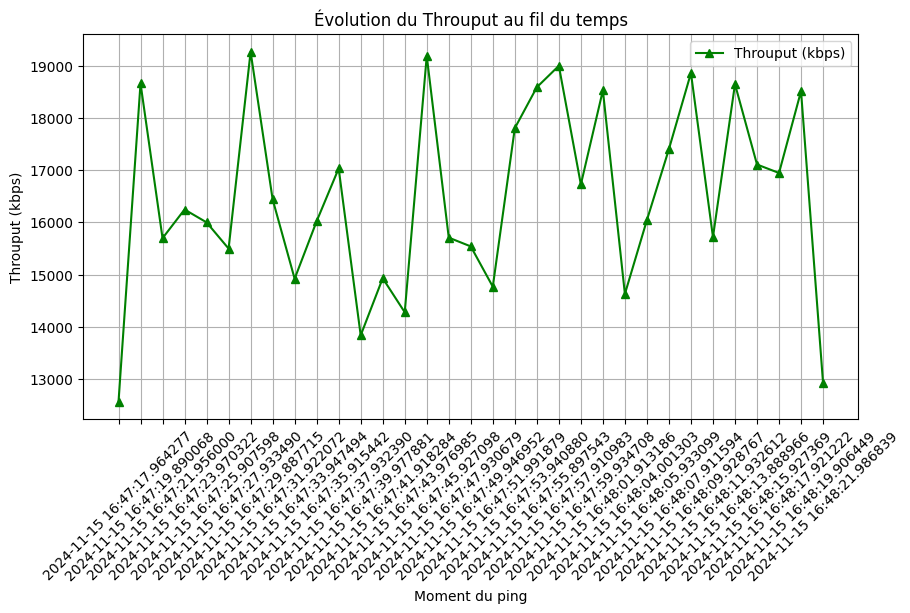

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(df["Moment du ping"], df["Throuput"], marker='^', linestyle='-', color='g', label="Throuput (kbps)")
plt.xlabel("Moment du ping")
plt.ylabel("Throuput (kbps)")
plt.title("√âvolution du Throuput au fil du temps")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suppression des colonnes inutiles
df_clean = df.drop(columns=['Num_Test', 'ID_user', 'Ville', 'Date_Performance', 
                            'Moment du ping', 'IP_source', 'server_name', 
                            'IP_destination', 'Port_source', 'Port_destination'])

# Encodage des variables cat√©goriques
encoder = LabelEncoder()
df_clean['Input'] = encoder.fit_transform(df_clean['Input'])
df_clean['Technologie_Reseau'] = encoder.fit_transform(df_clean['Technologie_Reseau'])
df_clean['Output'] = encoder.fit_transform(df_clean['Output'])

# S√©paration des features et target
X = df_clean.drop(columns=['Latence'])
y = df_clean['Latence']

# Normalisation des features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# S√©paration des donn√©es en train et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Mod√®le de r√©gression
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Pr√©dictions
y_pred = model.predict(X_test)

# √âvaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R¬≤: {r2}")

MAE: 0.03300000000000125
MSE: 0.001962631428571342
R¬≤: 0.9989828343874939


üìå √âtape 1 : Collecte et pr√©paration des donn√©es
Tu as d√©j√† des fichiers CSV contenant les donn√©es r√©seau (Latence, Jitter, Throughput, Date_Performance).

üìå Exemple de chargement des donn√©es avec pandas :

üìå √âtape 2 : Entra√Ænement d'un mod√®le Machine Learning
üîπ 1. Pr√©diction de la latence avec une r√©gression (Random Forest)

In [ ]:
import pandas as pd

df = pd.read_csv("backend/app/data/Trace/sample.csv")

# Convertir les dates en format datetime
df["Date_Performance"] = pd.to_datetime(df["Date_Performance"])

# Supprimer les valeurs manquantes
df.dropna(inplace=True)

# Afficher les premi√®res lignes
print(df.head())


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import joblib

# Charger les donn√©es
features = ["Jitter", "Throuput"]  # Variables pr√©dictives
target = "Latence"

X = df[features]
y = df[target]

# S√©parer les donn√©es en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entra√Æner un mod√®le de r√©gression
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# √âvaluer le mod√®le
y_pred = model.predict(X_test)
print("Erreur MAE :", mean_absolute_error(y_test, y_pred))

# Sauvegarder le mod√®le entra√Æn√©
joblib.dump(model, "backend/app/models/latence_predictor.pkl")


üìå √âtape 3 : Int√©gration du mod√®le dans Flask
Dans Flask, on va cr√©er une API qui re√ßoit des donn√©es en JSON et retourne une pr√©diction.

Ajoute cette route dans ton backend Flask :

In [ ]:
from flask import request
import joblib
import numpy as np

# Charger le mod√®le sauvegard√©
model = joblib.load("backend/app/models/latence_predictor.pkl")

@app.route('/api/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        jitter = float(data["Jitter"])
        throughput = float(data["Throuput"])

        # Faire une pr√©diction
        prediction = model.predict(np.array([[jitter, throughput]]))[0]

        return jsonify({"predicted_Latence": prediction})
    except Exception as e:
        return jsonify({"error": str(e)}), 400


In [ ]:
<template>
  <div>
    <h3>Pr√©dire la Latence R√©seau</h3>
    <input v-model="jitter" type="number" placeholder="Jitter (ms)" />
    <input v-model="throughput" type="number" placeholder="Throughput (kbps)" />
    <button @click="predictLatence">Pr√©dire</button>
    <p v-if="prediction">Latence Pr√©dite: {{ prediction }} ms</p>
  </div>
</template>

<script>
import axios from "axios";
import { ref } from "vue";

export default {
  name: "PredictionComponent",
  setup() {
    const jitter = ref(0);
    const throughput = ref(0);
    const prediction = ref(null);

    const predictLatence = async () => {
      try {
        const response = await axios.post("http://127.0.0.1:5000/api/predict", {
          Jitter: jitter.value,
          Throuput: throughput.value,
        });
        prediction.value = response.data.predicted_Latence;
      } catch (error) {
        console.error("Erreur de pr√©diction :", error);
      }
    };

    return { jitter, throughput, prediction, predictLatence };
  },
};
</script>
